In [ ]:
!pip install lifelines

     |████████████████████████████████| 348kB 4.1MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4035 sha256=9c2d33340611bdd5d4512a331e2ee183ea2f12cc427c2a8c41161ffac6a98762
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [ ]:
!wget 'https://raw.githubusercontent.com/bimmui/heroku-survivial-analysis-visualization/main/DO_cBio_lungcancer-dataset.csv'

--2021-02-19 23:45:09--  https://raw.githubusercontent.com/bimmui/heroku-survivial-analysis-visualization/main/DO_cBio_lungcancer-dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13097 (13K) [text/plain]
Saving to: ‘DO_cBio_lungcancer-dataset.csv’

DO_cBio_lungcancer- 100%[===================>]  12.79K  --.-KB/s    in 0s      

2021-02-19 23:45:09 (57.0 MB/s) - ‘DO_cBio_lungcancer-dataset.csv’ saved [13097/13097]



##2. Kaplan-Meier-Estimator



In [ ]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#Read the dataset:

#data = pd.read_table("DO_cBio_lungcancer-dataset.csv")
#data.head()

#if the above doesnt work out, you know what to do with this
study_id = []
patient_id = []
sample_id = []
diagnosis_age = []
cancer_tiep = []
cancer_tiep_detailed = []
mcount = []
onco = []
sex = []
smoker = []
sample_tiep = []
shistory = []
chemo = []
survivalm = []
survivals = []
radiation = []
treatment = []
UICC = []
tstage = []
mstage = []
nstage = []
firstpath = []


In [ ]:
#@title Run this if using the github link didnt work
study_iddata = """sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015
sclc_ucologne_2015"""
patient_iddata = """sclc_ucologne_2015_S00825
sclc_ucologne_2015_S00827
sclc_ucologne_2015_S00829
sclc_ucologne_2015_S00830
sclc_ucologne_2015_S00831
sclc_ucologne_2015_S00833
sclc_ucologne_2015_S00837
sclc_ucologne_2015_S00838
sclc_ucologne_2015_S01170
sclc_ucologne_2015_S01494
sclc_ucologne_2015_S01512
sclc_ucologne_2015_S01516
sclc_ucologne_2015_S01524
sclc_ucologne_2015_S01542
sclc_ucologne_2015_S01578
sclc_ucologne_2015_S02209
sclc_ucologne_2015_S02234
sclc_ucologne_2015_S02237
sclc_ucologne_2015_S02241
sclc_ucologne_2015_S02242
sclc_ucologne_2015_S02245
sclc_ucologne_2015_S02246
sclc_ucologne_2015_S02248
sclc_ucologne_2015_S02255
sclc_ucologne_2015_S02256
sclc_ucologne_2015_S02274
sclc_ucologne_2015_S02275
sclc_ucologne_2015_S02277
sclc_ucologne_2015_S02286
sclc_ucologne_2015_S02289
sclc_ucologne_2015_S02290
sclc_ucologne_2015_S02291
sclc_ucologne_2015_S02296
sclc_ucologne_2015_S02297
sclc_ucologne_2015_S02299
sclc_ucologne_2015_S02322
sclc_ucologne_2015_S02328
sclc_ucologne_2015_S02355
sclc_ucologne_2015_S02375
sclc_ucologne_2015_S02376
sclc_ucologne_2015_S02378
sclc_ucologne_2015_S02382
sclc_ucologne_2015_S02384
sclc_ucologne_2015_S02385
sclc_ucologne_2015_S02397
sclc_ucologne_2015_S02398
sclc_ucologne_2015_S02400
sclc_ucologne_2015_S02401
sclc_ucologne_2015_S02402
sclc_ucologne_2015_S02403
sclc_ucologne_2015_S02404"""
sample_iddata = """sclc_ucologne_2015_S00825
sclc_ucologne_2015_S00827
sclc_ucologne_2015_S00829
sclc_ucologne_2015_S00830
sclc_ucologne_2015_S00831
sclc_ucologne_2015_S00833
sclc_ucologne_2015_S00837
sclc_ucologne_2015_S00838
sclc_ucologne_2015_S01170
sclc_ucologne_2015_S01494
sclc_ucologne_2015_S01512
sclc_ucologne_2015_S01516
sclc_ucologne_2015_S01524
sclc_ucologne_2015_S01542
sclc_ucologne_2015_S01578
sclc_ucologne_2015_S02209
sclc_ucologne_2015_S02234
sclc_ucologne_2015_S02237
sclc_ucologne_2015_S02241
sclc_ucologne_2015_S02242
sclc_ucologne_2015_S02245
sclc_ucologne_2015_S02246
sclc_ucologne_2015_S02248
sclc_ucologne_2015_S02255
sclc_ucologne_2015_S02256
sclc_ucologne_2015_S02274
sclc_ucologne_2015_S02275
sclc_ucologne_2015_S02277
sclc_ucologne_2015_S02286
sclc_ucologne_2015_S02289
sclc_ucologne_2015_S02290
sclc_ucologne_2015_S02291
sclc_ucologne_2015_S02296
sclc_ucologne_2015_S02297
sclc_ucologne_2015_S02299
sclc_ucologne_2015_S02322
sclc_ucologne_2015_S02328
sclc_ucologne_2015_S02355
sclc_ucologne_2015_S02375
sclc_ucologne_2015_S02376
sclc_ucologne_2015_S02378
sclc_ucologne_2015_S02382
sclc_ucologne_2015_S02384
sclc_ucologne_2015_S02385
sclc_ucologne_2015_S02397
sclc_ucologne_2015_S02398
sclc_ucologne_2015_S02400
sclc_ucologne_2015_S02401
sclc_ucologne_2015_S02402
sclc_ucologne_2015_S02403
sclc_ucologne_2015_S02404"""
diagnosis_agedata = """59
73
63
51
63
77
70
73
71
58
64
62
77
74
76
83
76
60
61
82
63
68
67
64
61
60
72
67
68
58
61
65
70
68
51
70
63
68
75
57
70
59
69
69
48
62
44
72
57
76
75"""
cancer_tiepdata = """Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer"""
cancer_tiep_detaileddata = """Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer
Small Cell Lung Cancer"""
mcountdata = """218
515
243
205
195
186
166
243
226
61
298
209
103
267
366
315
263
194
184
359
197
351
369
523
136
200
138
279
271
296
316
135
240
73
732
344
383
88
248
379
170
263
372
151
340
73
205
70
107
183
197"""
oncodata = """SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC
SCLC"""
sexdata = """Male
Male
Male
Female
Male
Female
Female
Male
Male
Female
Male
Female
Male
Female
Male
Male
Male
Female
Male
Male
Female
Male
Male
Female
Male
Female
Male
Female
Male
Female
Male
Female
Male
Male
Male
Female
Male
Male
Female
Female
Female
Male
Female
Female
Female
Male
Male
Male
Male
Male
Male"""
smokerdata = """Current
Former
Former
Current
Former
Current
Current
Former
Former
Former
Current
Former
Former
Current
Former
Current
Current
Current
Current
Current
Current
Former
Former
Current
Current
Former
Former
Former
Former
Former
Current
Former
Current
Former
Current
Former
Current
Former
Current
Current
Current
Current
Current
Former
Former
Current
Former
Current
Current
Current
Current"""
sample_tiepdata = """Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Primary
Metastasis
Primary
Primary
Primary
Primary
Primary
Primary
Primary
"""
shistorydata = """50
10
25
70
30
23
70
50
60
24
40
25
25
50
60
10
60
42
35
90
20
50
88
35
50
45
40
50
45
21
90
60
50
30
50
55
80
48
60
43
100
40
40
40
0.75
20
18
55
40
50
50"""
chemodata = """Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
No
Yes
No
No"""
survivalmdata = """25
38
84
58
10
23
95
20
20
76
4
17
11
43
34
15
22
18
2
3
19
10
31
43
10
27
104
74
30
79
39
42
58
164
65
32
34
55
19
13
34
16
13
12
4
81
0
1
47
7
1"""
survivalsdata = """1:DECEASED
0:LIVING
0:LIVING
0:LIVING
1:DECEASED
1:DECEASED
1:DECEASED
1:DECEASED
1:DECEASED
0:LIVING
0:LIVING
1:DECEASED
1:DECEASED
0:LIVING
1:DECEASED
1:DECEASED
0:LIVING
1:DECEASED
1:DECEASED
1:DECEASED
1:DECEASED
1:DECEASED
0:LIVING
0:LIVING
1:DECEASED
1:DECEASED
0:LIVING
0:LIVING
1:DECEASED
0:LIVING
1:DECEASED
0:LIVING
1:DECEASED
0:LIVING
0:LIVING
0:LIVING
0:LIVING
0:LIVING
0:LIVING
0:LIVING
0:LIVING
1:DECEASED
1:DECEASED
1:DECEASED
0:LIVING
0:LIVING
1:DECEASED
0:LIVING
0:LIVING
0:LIVING
1:DECEASED"""
firstpathdata = """Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Biopsy
Biopsy
Biopsy
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection
Surgical Resection"""
radiationdata = """Yes
Yes
Yes
Yes
No
No
No
No
No
Yes
Yes
No
No
No
No
No
Yes
No
No
No
No
Yes
Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
No
No
No
No
No
No
No"""
mstagedata = """0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
x
x
0
0
0
0
0
0
0
0
0
0
x
0
0
1a
1b
1a
0
0
0
0
0
0
0"""
nstagedata = """2
1
0
1
X
X
0
2
0
1
0
0
0
0
0
0
2
2
1
0
0
1
1
0
2
0
0
0
2
2
0
0
0
0
0
0
2
2
0
0
0
3
1
3
0
1
1
2
0
0
0"""
tstagedata = """2
2
2
2
2
1
1
4
1
2a
1
1
1
2
1
2a
1a
1b
3
2a
1b
1
1b
1b
2a
1
3
2
3
1
1
2
1
1
2
3
4
1a
1a
1a
1b
4
4
2a
1b
2a
2a
2a
2a
2b
2b"""
treatmentdata = """Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Relapse
Relapse
Relapse
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated
Untreated"""
UICCdata = """IIIa
IIb
IIa
IIb
IV
Ia
Ia
IIIb
Ia
IIa
Ia
Ia
Ia
Ib
Ia
IB
IIIa
IIIa
IIIa
Ib
Ia
IIa
IIa
Ia
IIIa
I
IIb
Ib
IIIa
IIIa
Ia
Ib
Ia
Ia
Ib
IIb
IIIb
IIIa
Ia
Ia
Ia
IV
IV
IV
Ia
IIa
IIa
IIIa
Ib
IIa
IIa"""

In [ ]:
#@title Related to the chunk of code above, skip if not neccessary
#partition the spreadsheet data and add them to the lists

a = study_iddata.splitlines()
for i in a:
  study_id.append(i)
print(len(study_id))

b = patient_iddata.splitlines()
for i in b:
  patient_id.append(i)
print(len(patient_id))

w = sample_iddata.splitlines()
for i in w:
  sample_id.append(i)
print(len(sample_id))

c = diagnosis_agedata.splitlines()
for i in c:
  diagnosis_age.append(i)
print(len(diagnosis_age))

d = cancer_tiepdata.splitlines()
for i in d:
  cancer_tiep.append(i)
print(len(cancer_tiep))

e = cancer_tiep_detaileddata.splitlines()
for i in e:
  cancer_tiep_detailed.append(i)
print(len(cancer_tiep_detailed))

f = mcountdata.splitlines()
for i in f:
  mcount.append(i)
print(len(mcount))

g = oncodata.splitlines()
for i in g:
  onco.append(i)
print(len(onco))

h = sexdata.splitlines()
for i in h:
  sex.append(i)
print(len(sex))

j = smokerdata.splitlines()
for i in j:
  smoker.append(i)
print(len(smoker))

k = chemodata.splitlines()
for i in k:
  chemo.append(i)
print(len(chemo))

l = shistorydata.splitlines()
for i in l:
  shistory.append(i)
print(len(shistory))

m = survivalmdata.splitlines()
for i in m:
  survivalm.append(i)
print(len(survivalm))
  
n = survivalsdata.splitlines()
for i in n:
  survivals.append(i)
print(len(survivals))
  
o = radiationdata.splitlines()
for i in o:
  radiation.append(i)
print(len(radiation))
  
p = treatmentdata.splitlines()
for i in p:
  treatment.append(i)
print(len(treatment))
  
q = UICCdata.splitlines()
for i in q:
  UICC.append(i)
print(len(UICC))

r = firstpathdata.splitlines()
for i in r:
  firstpath.append(i)
print(len(firstpath))

s = sample_tiepdata.splitlines()
for i in s:
  sample_tiep.append(i)
print(len(sample_tiep))

t = mstagedata.splitlines()
for i in t:
  mstage.append(i)
print(len(mstage))

u = nstagedata.splitlines()
for i in u:
  nstage.append(i)
print(len(nstage))

v = tstagedata.splitlines()
for i in v:
  tstage.append(i)
print(len(tstage))

In [ ]:
#@title Gives a sample graph of the data
# creating the dataframe with the data 
holder = {'Study ID':study_id, "Patient ID":patient_id, "Sample ID":sample_id, "Sample Type":sample_tiep, "Diagnosis Age":diagnosis_age, "Cancer Type":cancer_tiep, "Cancer Type Detailed":cancer_tiep_detailed, "Mutation Count":mcount, "Oncotree Code":onco, "Sex":sex, "Smoker":smoker, "Smoking History":shistory, "Chemotherapy":chemo, "Overall survival months":survivalm, "Overall survival status":survivals,"First Pathologic Diagnosis Biospecimen Acquisition Method Type":firstpath, "Radiation Therapy":radiation, "M Stage":mstage, "N Stage":nstage, "T Stage":tstage, "Previous Treatment":treatment, "UICC Tumor Stage":UICC}
data = pd.DataFrame.from_dict(holder, orient='index')
data = data.transpose()
data.head()

,Study ID,Patient ID,Sample ID,Sample Type,Diagnosis Age,Cancer Type,Cancer Type Detailed,Mutation Count,Oncotree Code,Sex,Smoker,Smoking History,Chemotherapy,Overall survival months,Overall survival status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Radiation Therapy,M Stage,N Stage,T Stage,Previous Treatment,UICC Tumor Stage
0,sclc_ucologne_2015,sclc_ucologne_2015_S00825,sclc_ucologne_2015_S00825,Primary,59,Small Cell Lung Cancer,Small Cell Lung Cancer,218,SCLC,Male,Current,50,Yes,25,1:DECEASED,Surgical Resection,Yes,0,2,2,Untreated,IIIa
1,sclc_ucologne_2015,sclc_ucologne_2015_S00827,sclc_ucologne_2015_S00827,Primary,73,Small Cell Lung Cancer,Small Cell Lung Cancer,515,SCLC,Male,Former,10,Yes,38,0:LIVING,Surgical Resection,Yes,0,1,2,Untreated,IIb
2,sclc_ucologne_2015,sclc_ucologne_2015_S00829,sclc_ucologne_2015_S00829,Primary,63,Small Cell Lung Cancer,Small Cell Lung Cancer,243,SCLC,Male,Former,25,Yes,84,0:LIVING,Surgical Resection,Yes,0,0,2,Untreated,IIa
3,sclc_ucologne_2015,sclc_ucologne_2015_S00830,sclc_ucologne_2015_S00830,Primary,51,Small Cell Lung Cancer,Small Cell Lung Cancer,205,SCLC,Female,Current,70,Yes,58,0:LIVING,Surgical Resection,Yes,0,1,2,Untreated,IIb
4,sclc_ucologne_2015,sclc_ucologne_2015_S00831,sclc_ucologne_2015_S00831,Primary,63,Small Cell Lung Cancer,Small Cell Lung Cancer,195,SCLC,Male,Former,30,Yes,10,1:DECEASED,Surgical Resection,No,1,X,2,Untreated,IV


In [ ]:
#Print the column names of our data:

print(data.columns)

Index(['Study ID', 'Patient ID', 'Sample ID', 'Sample Type', 'Diagnosis Age',
       'Cancer Type', 'Cancer Type Detailed', 'Mutation Count',
       'Oncotree Code', 'Sex', 'Smoker', 'Smoking History', 'Chemotherapy',
       'Overall survival months', 'Overall survival status',
       'First Pathologic Diagnosis Biospecimen Acquisition Method Type',
       'Radiation Therapy', 'M Stage', 'N Stage', 'T Stage',
       'Previous Treatment', 'UICC Tumor Stage'],
      dtype='object')


In [ ]:
#Convert the columns that are supposed to be integers to integer
data['Diagnosis Age'] = data['Diagnosis Age'].astype(float) 
data['Mutation Count'] = data['Mutation Count'].astype(float)
data['Overall survival months'] = data['Overall survival months'].astype(float)
data['Smoking History'] = data['Smoking History'].astype(float)

#Additional info about our dataset:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 22 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Study ID                                                        51 non-null     object 
 1   Patient ID                                                      51 non-null     object 
 2   Sample ID                                                       51 non-null     object 
 3   Sample Type                                                     51 non-null     object 
 4   Diagnosis Age                                                   51 non-null     float64
 5   Cancer Type                                                     51 non-null     object 
 6   Cancer Type Detailed                                            51 non-null     object 
 7   Mutation Count                                         

In [ ]:
#Statistical info about our dataset:

data.describe()

,Diagnosis Age,Mutation Count,Smoking History,Overall survival months
count,51.000000,51.000000,51.000000,51.000000
mean,66.078431,247.941176,45.348039,34.941176
std,8.339888,126.765675,21.390598,32.413214
min,44.000000,61.000000,0.750000,0.000000
25%,61.000000,176.500000,30.000000,12.500000
50%,67.000000,226.000000,45.000000,25.000000
75%,72.000000,315.500000,55.000000,45.000000
max,83.000000,732.000000,100.000000,164.000000


In [ ]:
#Plot histogram for sex of patient:

print (data["Sex"].hist())

In [ ]:
#Create an object of KaplanMeierFitter:

kmf = KaplanMeierFitter() 

#Organize our data:

#If status = 1 , then dead = 0
#If status = 2 , then dead = 1

data.loc[data['Overall survival status'] == '0:LIVING', 'dead'] = 0
data.loc[data['Overall survival status'] == '1:DECEASED', 'dead'] = 1

#Convert "dead" coulmn to string to be able to delete rows with no information then convert back to integers
data['dead'] = data['dead'].astype(str) 
data = data[~data.dead.str.contains("nan")]
data['dead'] = pd.to_numeric(data['dead'])


#Convert "Overall survival months" coulmn to string to be able to delete rows with no information then convert back to integers
data['Overall survival months'] = data['Overall survival months'].astype(str) 
data = data[~data['Overall survival months'].str.contains("nan")]

#Get rid of duplicate rows given the patient row
data = data.drop_duplicates(subset = ["Patient ID"])
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 23 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Study ID                                                        51 non-null     object 
 1   Patient ID                                                      51 non-null     object 
 2   Sample ID                                                       51 non-null     object 
 3   Sample Type                                                     51 non-null     object 
 4   Diagnosis Age                                                   51 non-null     float64
 5   Cancer Type                                                     51 non-null     object 
 6   Cancer Type Detailed                                            51 non-null     object 
 7   Mutation Count                                         

,Study ID,Patient ID,Sample ID,Sample Type,Diagnosis Age,Cancer Type,Cancer Type Detailed,Mutation Count,Oncotree Code,Sex,Smoker,Smoking History,Chemotherapy,Overall survival months,Overall survival status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Radiation Therapy,M Stage,N Stage,T Stage,Previous Treatment,UICC Tumor Stage,dead
0,sclc_ucologne_2015,sclc_ucologne_2015_S00825,sclc_ucologne_2015_S00825,Primary,59.0,Small Cell Lung Cancer,Small Cell Lung Cancer,218.0,SCLC,Male,Current,50.0,Yes,25.0,1:DECEASED,Surgical Resection,Yes,0,2,2,Untreated,IIIa,1.0
1,sclc_ucologne_2015,sclc_ucologne_2015_S00827,sclc_ucologne_2015_S00827,Primary,73.0,Small Cell Lung Cancer,Small Cell Lung Cancer,515.0,SCLC,Male,Former,10.0,Yes,38.0,0:LIVING,Surgical Resection,Yes,0,1,2,Untreated,IIb,0.0
2,sclc_ucologne_2015,sclc_ucologne_2015_S00829,sclc_ucologne_2015_S00829,Primary,63.0,Small Cell Lung Cancer,Small Cell Lung Cancer,243.0,SCLC,Male,Former,25.0,Yes,84.0,0:LIVING,Surgical Resection,Yes,0,0,2,Untreated,IIa,0.0
3,sclc_ucologne_2015,sclc_ucologne_2015_S00830,sclc_ucologne_2015_S00830,Primary,51.0,Small Cell Lung Cancer,Small Cell Lung Cancer,205.0,SCLC,Female,Current,70.0,Yes,58.0,0:LIVING,Surgical Resection,Yes,0,1,2,Untreated,IIb,0.0
4,sclc_ucologne_2015,sclc_ucologne_2015_S00831,sclc_ucologne_2015_S00831,Primary,63.0,Small Cell Lung Cancer,Small Cell Lung Cancer,195.0,SCLC,Male,Former,30.0,Yes,10.0,1:DECEASED,Surgical Resection,No,1,X,2,Untreated,IV,1.0


In [ ]:
#Fit the parameter values in our object:

kmf.fit(durations =  data["Overall survival months"], event_observed = data["dead"])

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 51 total observations, 26 right-censored observations>

In [ ]:
#Print the event table:

kmf.event_table

# Removed = Observed + Censored
# Censored = Person that didn't die.(They are of no use to us!)
# Observed = Persons that died.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,1,1,0,51,51
1.0,2,1,1,0,50
2.0,1,1,0,0,48
3.0,1,1,0,0,47
4.0,2,0,2,0,46
7.0,1,0,1,0,44
10.0,3,3,0,0,43
11.0,1,1,0,0,40
12.0,1,1,0,0,39


In [ ]:
#Calculating the survival probability for a given time:

event_at_0 = kmf.event_table.iloc[0,:]

#Calculate the survival probability for t=0:

surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

0.9803921568627451

In [ ]:
#Calculating the survival probability for a given time:

event_at_1 = kmf.event_table.iloc[1,:]

#Calculate the survival probability for t=5:
event_at_1 = (event_at_1.at_risk - event_at_1.observed)/event_at_1.at_risk
event_at_1

0.98

In [ ]:
#Calculating the survival probability for a given time:

event_at_2 = kmf.event_table.iloc[2,:]

#Calculate the survival probability for t=11:
event_at_2 = (event_at_2.at_risk - event_at_2.observed)/event_at_2.at_risk
event_at_2

0.9791666666666666

In [ ]:
#Calculating the actual survival probability at a given time:

surv_after_0 = surv_for_0 
print("Survival Probability After 0 Days: ",surv_after_0)

Survival Probability After 0 Days:  0.9803921568627451


In [ ]:
#Calculating the actual survival probability at a given time:

event_at_1 = surv_for_0 * event_at_1
print("Survival Probability After 1 Month: ",event_at_1)

Survival Probability After 1 Month:  0.9607843137254901


In [ ]:
#Calculating the actual survival probability at a given time:

event_at_2 = surv_for_0 * event_at_1 * event_at_2
print("Survival Probability After 2 Months: ",event_at_2)

Survival Probability After 2 Months:  0.9223215429962833


In [ ]:
#Get the probability values the easy way!

print("Survival probability for t=0: ",kmf.predict(0))
print("Survival probability for t=1: ",kmf.predict(1))
print("Survival probability for t=2: ",kmf.predict(2))
print("Survival probability for t=3: ",kmf.predict(3))
print("Survival probability for t=4: ",kmf.predict(4))
print("Survival probability for t=5: ",kmf.predict(5))

Survival probability for t=0:  0.9803921568627451
Survival probability for t=1:  0.9607843137254901
Survival probability for t=2:  0.9407679738562087
Survival probability for t=3:  0.9207516339869278
Survival probability for t=4:  0.9207516339869278
Survival probability for t=5:  0.9207516339869278


In [ ]:
#Predicting the surviaval probability for an array of value:

kmf.predict([0,5,11,12])

0     0.980392
5     0.920752
11    0.835100
12    0.813687
Name: KM_estimate, dtype: float64

In [ ]:
#To get the full list:

kmf.survival_function_

Text(0, 0.5, 'Probability of survival')

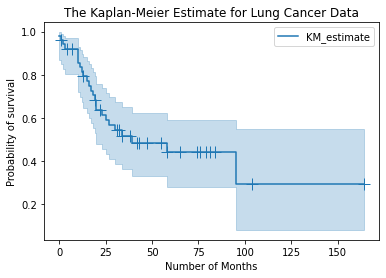

In [ ]:
#Plot the graph:

kmf.plot(show_censors=True)
plt.title("The Kaplan-Meier Estimate for Lung Cancer Data")
plt.xlabel("Number of Months")
plt.ylabel("Probability of survival")

In [ ]:
#The median number of days:

print("The median survival time: ",kmf.median_survival_time_, "months")

The median survival time:  39.0 months


In [ ]:
#Survival probability with confidence interval:

kmf.confidence_interval_survival_function_

In [ ]:
#Plot survival function with confidence interval:

confidence_surv_func = kmf.confidence_interval_survival_function_

plt.plot(confidence_surv_func["KM_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["KM_estimate_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [ ]:
#Probabaility of a subject dying:
#p(1022) = p(0) +......+p(1022)

kmf.cumulative_density_

Text(0, 0.5, "Probability of person's death")

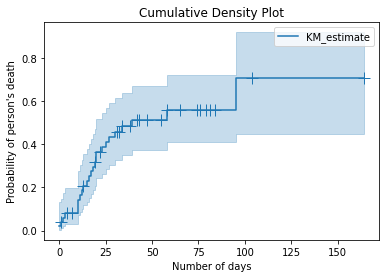

In [ ]:
#Plot the cumulative density graph:

kmf.plot_cumulative_density(show_censors=True)
plt.title("Cumulative Density Plot")
plt.xlabel("Number of days")
plt.ylabel("Probability of person's death")

In [ ]:
#Cumulative density with confidence interval:

kmf.confidence_interval_cumulative_density_

In [ ]:
#Plot cumulative density with confidence interval:

confidence_cumulative_density = kmf.confidence_interval_cumulative_density_

plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_lower_0.95"],label="Lower")
plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative Density With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Cumulative Density")
plt.legend()

In [ ]:
#Find cumulative density at a specific time:

kmf.cumulative_density_at_times(times=100)

100    0.705332
Name: KM_estimate, dtype: float64

In [ ]:
#Conditional median time to event of interest:

kmf.conditional_time_to_event_

In [ ]:
#Conditional median time left for event:

median_time_to_event = kmf.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

##3. Nelson-Aalen-Estimator

In [ ]:
#Hazard function:

from lifelines import NelsonAalenFitter

#Create an object of NelsonAalenFitter:

naf = NelsonAalenFitter()

#Fit our data into the object:

naf.fit(data["Overall survival months"], event_observed=data["dead"])

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 51 total observations, 26 right-censored observations>

In [ ]:
#Print the cumulative hazard:

naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.019608
1.0,0.039608
2.0,0.060441
3.0,0.081718
4.0,0.081718
7.0,0.081718
10.0,0.153173
11.0,0.178173
12.0,0.203814


Text(0, 0.5, "Cumulative Probability of person's death")

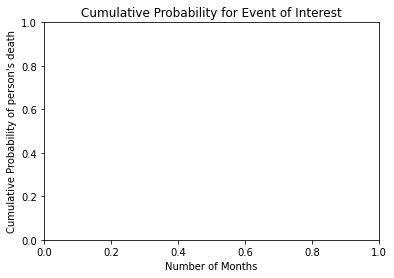

In [ ]:
#Plot the cumulative hazard grpah:

naf.plot_cumulative_hazard
plt.title("Cumulative Probability for Event of Interest")
plt.xlabel("Number of Months")
plt.ylabel("Cumulative Probability of person's death")

In [ ]:
#We can predict the value at a certain point :

print("Time = 30 months: ",naf.predict(30))
print("Time = 300 months: ",naf.predict(300))

Time = 30 months:  0.6024255044728126
Time = 300 months:  1.1331105057460487


In [ ]:
#Cumulative hazard with confidence interval:

naf.confidence_interval_

,NA_estimate_lower_0.95,NA_estimate_upper_0.95
0.0,0.002762,0.139197
1.0,0.009905,0.158380
2.0,0.019486,0.187470
3.0,0.030654,0.217841
4.0,0.030654,0.217841
7.0,0.030654,0.217841
10.0,0.072845,0.322081
11.0,0.088867,0.357228
12.0,0.105743,0.392840
13.0,0.123442,0.429028


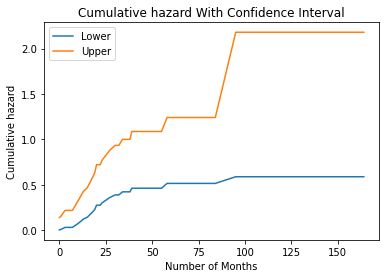

In [ ]:
#Plot cumulative hazard with confidence interval:

confidence_interval = naf.confidence_interval_

plt.plot(confidence_interval["NA_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_interval["NA_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative hazard With Confidence Interval")
plt.xlabel("Number of Months")
plt.ylabel("Cumulative hazard")
plt.legend()

Text(0.5, 0, 'Number of Months')

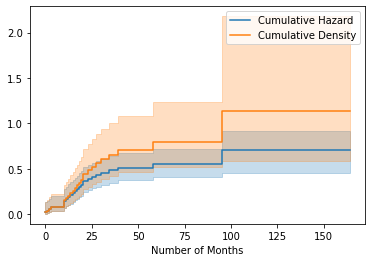

In [ ]:
#Plot the cumulative_hazard and cumulative density:

kmf.plot_cumulative_density(label="Cumulative Hazard")
naf.plot_cumulative_hazard(label="Cumulative Density")
plt.xlabel("Number of Months")

##4. Kaplan-Meier fitter Based on Different Groups

In [ ]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#Read the dataset:

data.head()

,Study ID,Patient ID,Sample ID,Sample Type,Diagnosis Age,Cancer Type,Cancer Type Detailed,Mutation Count,Oncotree Code,Sex,Smoker,Smoking History,Chemotherapy,Overall survival months,Overall survival status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Radiation Therapy,M Stage,N Stage,T Stage,Previous Treatment,UICC Tumor Stage,dead
0,sclc_ucologne_2015,sclc_ucologne_2015_S00825,sclc_ucologne_2015_S00825,Primary,59.0,Small Cell Lung Cancer,Small Cell Lung Cancer,218.0,SCLC,Male,Current,50.0,Yes,25.0,1:DECEASED,Surgical Resection,Yes,0,2,2,Untreated,IIIa,1.0
1,sclc_ucologne_2015,sclc_ucologne_2015_S00827,sclc_ucologne_2015_S00827,Primary,73.0,Small Cell Lung Cancer,Small Cell Lung Cancer,515.0,SCLC,Male,Former,10.0,Yes,38.0,0:LIVING,Surgical Resection,Yes,0,1,2,Untreated,IIb,0.0
2,sclc_ucologne_2015,sclc_ucologne_2015_S00829,sclc_ucologne_2015_S00829,Primary,63.0,Small Cell Lung Cancer,Small Cell Lung Cancer,243.0,SCLC,Male,Former,25.0,Yes,84.0,0:LIVING,Surgical Resection,Yes,0,0,2,Untreated,IIa,0.0
3,sclc_ucologne_2015,sclc_ucologne_2015_S00830,sclc_ucologne_2015_S00830,Primary,51.0,Small Cell Lung Cancer,Small Cell Lung Cancer,205.0,SCLC,Female,Current,70.0,Yes,58.0,0:LIVING,Surgical Resection,Yes,0,1,2,Untreated,IIb,0.0
4,sclc_ucologne_2015,sclc_ucologne_2015_S00831,sclc_ucologne_2015_S00831,Primary,63.0,Small Cell Lung Cancer,Small Cell Lung Cancer,195.0,SCLC,Male,Former,30.0,Yes,10.0,1:DECEASED,Surgical Resection,No,1,X,2,Untreated,IV,1.0


In [ ]:
#Organize our data:

#If status = 1 , then dead = 0
#If status = 2 , then dead = 1

#data.loc[data.dead == 1, 'dead'] = 0
#data.loc[data.dead == 2, 'dead'] = 1

data.head()

In [ ]:
#Create two objects for groups:

#kmf_current for current smoker data:
#kmf_former for former smoker data:

kmf_untreated = KaplanMeierFitter() 
kmf_treated = KaplanMeierFitter() 

In [ ]:
#Dividing data into groups:

t_stage = data[(data["Previous Treatment"] == "Untreated")]
n-stage = data[(data["Previous Treatment"] == "Relapse")]

#View data of Male group:

untreated.head()

In [ ]:
#View data of Female group:

treated.head()

,Study ID,Patient ID,Sample ID,Sample Type,Diagnosis Age,Cancer Type,Cancer Type Detailed,Mutation Count,Oncotree Code,Sex,Smoker,Smoking History,Chemotherapy,Overall survival months,Overall survival status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Radiation Therapy,M Stage,N Stage,T Stage,Previous Treatment,UICC Tumor Stage,dead
41,sclc_ucologne_2015,sclc_ucologne_2015_S02382,sclc_ucologne_2015_S02382,Primary,59.0,Small Cell Lung Cancer,Small Cell Lung Cancer,263.0,SCLC,Male,Current,40.0,Yes,16.0,1:DECEASED,Biopsy,Yes,1a,3,4,Relapse,IV,1.0
42,sclc_ucologne_2015,sclc_ucologne_2015_S02384,sclc_ucologne_2015_S02384,Primary,69.0,Small Cell Lung Cancer,Small Cell Lung Cancer,372.0,SCLC,Female,Current,40.0,Yes,13.0,1:DECEASED,Biopsy,No,1b,1,4,Relapse,IV,1.0
43,sclc_ucologne_2015,sclc_ucologne_2015_S02385,sclc_ucologne_2015_S02385,Metastasis,69.0,Small Cell Lung Cancer,Small Cell Lung Cancer,151.0,SCLC,Female,Former,40.0,Yes,12.0,1:DECEASED,Biopsy,Yes,1a,3,2a,Relapse,IV,1.0


In [ ]:
#Fit data into objects:

kmf_untreated.fit(durations =  untreated["Overall survival months"],event_observed = untreated["dead"] ,label="Untreated")
kmf_treated.fit(durations =  treated["Overall survival months"],event_observed = treated["dead"], label="Relapse")

/usr/local/lib/python3.6/dist-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.6/dist-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"Relapse", fitted with 3 total observations, 0 right-censored observations>

In [ ]:
#Event table for male group:

kmf_current.event_table

In [ ]:
#Event table for female group:

kmf_former.event_table

In [ ]:
#Predict value based on time:

kmf_radyes.predict(11)

0.9583333333333331

In [ ]:
#Predict value based on time:

kmf_radno.predict(11)

0.7097342017250485

In [ ]:
#Get complete data of survival function for male group:

kmf_m.survival_function_

In [ ]:
#Get complete data of survival function for female group:

kmf_f.survival_function_

Text(0.5, 1.0, 'Kaplan-Meier Fitter')

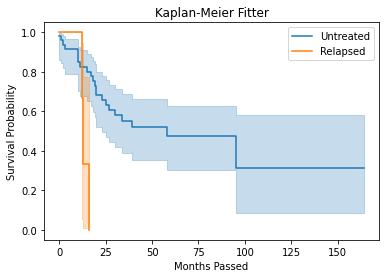

In [ ]:
#Plot the survival_function data:

kmf_untreated.plot(label="Untreated")
kmf_treated.plot(label="Relapsed")

plt.xlabel("Months Passed")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Fitter")

In [ ]:
#Cumulative density for male group:

kmf_m.cumulative_density_

In [ ]:
#Cumulative density for female group:

kmf_f.cumulative_density_

In [ ]:
#PLot the graph for cumulative density for both groups:

kmf_chemyes.plot_cumulative_density()
kmf_chemno.plot_cumulative_density()
plt.title("Cumulative Density")
plt.xlabel("Number of Months")
plt.ylabel("Probability of Death")

In [ ]:
#Hazard Function:

from lifelines import NelsonAalenFitter

In [ ]:
#Fitting the data into objects:
naf_untreated = NelsonAalenFitter()
naf_treated = NelsonAalenFitter()

naf_untreated.fit(untreated["Overall survival months"],event_observed = untreated["dead"])
naf_treated.fit(treated["Overall survival months"],event_observed = treated["dead"])

/usr/local/lib/python3.6/dist-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.6/dist-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 3 total observations, 0 right-censored observations>

In [ ]:
#Cumulative hazard for male group:

naf_current.cumulative_hazard_

In [ ]:
#Cumulative hazard for female group:

naf_f.cumulative_hazard_

Text(0, 0.5, 'Cumulative Hazard')

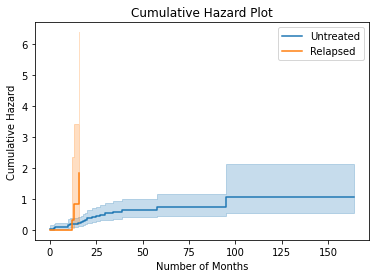

In [ ]:
#Plot the graph for cumulative hazard:

naf_untreated.plot_cumulative_hazard(label="Untreated")
naf_treated.plot_cumulative_hazard(label="Relapsed")
plt.title("Cumulative Hazard Plot")
plt.xlabel("Number of Months")
plt.ylabel("Cumulative Hazard")

In [ ]:
#Conditional median time to event of interest:

kmf_m.conditional_time_to_event_

In [ ]:
#Conditional median time left for event for male group:

median_time_to_event = kmf_current.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total Months")
plt.ylabel("Conditional median time to event")
plt.legend()

In [ ]:
#Conditional median time to event of interest for female group:

kmf_former.conditional_time_to_event_

In [ ]:
#Conditional median time left for event for female group:

median_time_to_event = kmf_former.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total Months")
plt.ylabel("Conditional median time to event")
plt.legend()

In [ ]:
#Survival probability with confidence interval for male group:

kmf_m.confidence_interval_survival_function_

In [ ]:
#Plot survival function with confidence interval for male group:

confidence_surv_func = kmf_current.confidence_interval_survival_function_

plt.plot(confidence_surv_func["Current_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Current_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of Months")
plt.ylabel("Survival Probability")
plt.legend()

In [ ]:
#Survival probability with confidence interval for female group:

kmf_f.confidence_interval_survival_function_

In [ ]:
#Plot survival function with confidence interval for female group:

confidence_surv_func = kmf_former.confidence_interval_survival_function_

plt.plot(confidence_surv_func["Former_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Former_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of Months")
plt.ylabel("Survival Probability")
plt.legend()

In [ ]:
#Plot the cumulative_hazard and cumulative density:

kmf_current.plot_cumulative_density(label="Current Smoker Density")
naf_current.plot_cumulative_hazard(label="Current Smoker Hazard")
plt.xlabel("Number of Months")

In [ ]:
#Plot the cumulative_hazard and cumulative density:

kmf_former.plot_cumulative_density(label="Former Smoker Density")
naf_former.plot_cumulative_hazard(label="Former Smoker Hazard")
plt.xlabel("Number of Months")

##5. Log-rank Test

In [ ]:
untreated['Overall survival months'] = untreated['Overall survival months'].astype(float)
treated['Overall survival months'] = treated['Overall survival months'].astype(float)

#Define variables for log-rank test:

Time_A = untreated['Overall survival months']
Event_A = untreated['dead']

Time_B = treated['Overall survival months']
Event_B = treated['dead']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Performing the Log-Rank test:

from lifelines.statistics import logrank_test

results = logrank_test(Time_A, Time_B, event_observed_A=Event_A, event_observed_B=Event_B)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           7.90 <0.005      7.66

In [ ]:
#Print the P-value:

print("P-value :",results.p_value)

P-value : 0.00493819129966962


##6. Cox-regression

In [ ]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [ ]:
#Read the data file:

data = pd.read_csv("lung.csv")
data =  data.drop(["Unnamed: 0"],axis=1)
data.head()

In [ ]:
#Columns of dataset:

data.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Sample Type', 'Diagnosis Age',
       'Cancer Type', 'Cancer Type Detailed', 'Mutation Count',
       'Oncotree Code', 'Sex', 'Smoker', 'Smoking History', 'Chemotherapy',
       'Overall survival months', 'Overall survival status',
       'First Pathologic Diagnosis Biospecimen Acquisition Method Type',
       'Radiation Therapy', 'M Stage', 'N Stage', 'T Stage',
       'Previous Treatment', 'UICC Tumor Stage', 'dead', 'Converted T Stage',
       'Converted N Stage', 'Converted M Stage'],
      dtype='object')

In [ ]:
#Drop rows with null values:

data= data.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 
                          'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])
data.head()

In [ ]:
#Create an object:

kmf = KaplanMeierFitter() 

In [ ]:
#Organize the data
#This is a good reference, https://www.cancer.org/cancer/bladder-cancer/detection-diagnosis-staging/staging.html#references
#Rules for converting the strings with letters:
#a = 7
#b = 8
#x = 9

#T Stage Column
data.loc[data["T Stage"] == "1", 'Converted T Stage'] = 1
data.loc[data["T Stage"] == "2", 'Converted T Stage'] = 2
data.loc[data["T Stage"] == "3", 'Converted T Stage'] = 3
data.loc[data["T Stage"] == "4", 'Converted T Stage'] = 4
data.loc[data["T Stage"] == "1a", 'Converted T Stage'] = 17
data.loc[data["T Stage"] == "1b", 'Converted T Stage'] = 18
data.loc[data["T Stage"] == "2a", 'Converted T Stage'] = 27
data.loc[data["T Stage"] == "2b", 'Converted T Stage'] = 28

#N Stage Column
data.loc[data["N Stage"] == "0", 'Converted N Stage'] = 0
data.loc[data["N Stage"] == "1", 'Converted N Stage'] = 1
data.loc[data["N Stage"] == "2", 'Converted N Stage'] = 2
data.loc[data["N Stage"] == "3", 'Converted N Stage'] = 3
data.loc[data["N Stage"] == "X", 'Converted N Stage'] = 9

#M Stage Column
data.loc[data["M Stage"] == "0", 'Converted M Stage'] = 0
data.loc[data["M Stage"] == "1", 'Converted M Stage'] = 1
data.loc[data["M Stage"] == "1a", 'Converted M Stage'] = 17
data.loc[data["M Stage"] == "1b", 'Converted M Stage'] = 18
data.loc[data["M Stage"] == "x", 'Converted M Stage'] = 9
data.head()

,Study ID,Patient ID,Sample ID,Sample Type,Diagnosis Age,Cancer Type,Cancer Type Detailed,Mutation Count,Oncotree Code,Sex,Smoker,Smoking History,Chemotherapy,Overall survival months,Overall survival status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Radiation Therapy,M Stage,N Stage,T Stage,Previous Treatment,UICC Tumor Stage,dead,Converted T Stage,Converted N Stage,Converted M Stage
0,sclc_ucologne_2015,sclc_ucologne_2015_S00825,sclc_ucologne_2015_S00825,Primary,59.0,Small Cell Lung Cancer,Small Cell Lung Cancer,218.0,SCLC,Male,Current,50.0,Yes,25.0,1:DECEASED,Surgical Resection,Yes,0,2,2,Untreated,IIIa,1.0,2.0,2.0,0.0
1,sclc_ucologne_2015,sclc_ucologne_2015_S00827,sclc_ucologne_2015_S00827,Primary,73.0,Small Cell Lung Cancer,Small Cell Lung Cancer,515.0,SCLC,Male,Former,10.0,Yes,38.0,0:LIVING,Surgical Resection,Yes,0,1,2,Untreated,IIb,0.0,2.0,1.0,0.0
2,sclc_ucologne_2015,sclc_ucologne_2015_S00829,sclc_ucologne_2015_S00829,Primary,63.0,Small Cell Lung Cancer,Small Cell Lung Cancer,243.0,SCLC,Male,Former,25.0,Yes,84.0,0:LIVING,Surgical Resection,Yes,0,0,2,Untreated,IIa,0.0,2.0,0.0,0.0
3,sclc_ucologne_2015,sclc_ucologne_2015_S00830,sclc_ucologne_2015_S00830,Primary,51.0,Small Cell Lung Cancer,Small Cell Lung Cancer,205.0,SCLC,Female,Current,70.0,Yes,58.0,0:LIVING,Surgical Resection,Yes,0,1,2,Untreated,IIb,0.0,2.0,1.0,0.0
4,sclc_ucologne_2015,sclc_ucologne_2015_S00831,sclc_ucologne_2015_S00831,Primary,63.0,Small Cell Lung Cancer,Small Cell Lung Cancer,195.0,SCLC,Male,Former,30.0,Yes,10.0,1:DECEASED,Surgical Resection,No,1,X,2,Untreated,IV,1.0,2.0,9.0,1.0


In [ ]:
#Fit data into our object:

kmf.fit(durations =  data["Overall survival months"], event_observed = data["dead"])

/usr/local/lib/python3.6/dist-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 51 total observations, 26 right-censored observations>

In [ ]:
#Get the event table:

kmf.event_table

In [ ]:
#Get required columns from the data:

neccesarycolumns = data[['Diagnosis Age', 'Mutation Count', 'Smoking History',
       'Overall survival months', 'dead', 'Converted T Stage',
       'Converted N Stage', 'Converted M Stage']]

In [ ]:
#Get the summary using CoxPHFitter:

cph = CoxPHFitter()
cph.fit(neccesarycolumns,"Overall survival months",event_col="dead")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 51 total observations, 26 right-censored observations>
             duration col = 'Overall survival months'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 51
number of events observed = 25
   partial log-likelihood = -79.35
         time fit was run = 2021-02-20 18:50:38 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
Diagnosis Age       0.03       1.03       0.03            -0.03             0.08                 0.97                 1.09
Mutation Count     -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
Smoking History    -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
Converted T Stage   0.00       1.00       0.02            -0.04             0.04                 0.96                 1.04
Converted N Stage   0.15       1.17       0.10            -0.04             0.35                 0.96                 1.41
Converted M Stage   0.08       1.09       0.04             0.00             0.17                 1.00                 1.18

                      z    p   -log2(p)
covariate                              
Diagnosis Age      0.89 0.38       1.41
Mutation Count    -0.62 0.54       0.89
Smoking History   -0.69 0.49       1.03
Converted T Stage  0.04 0.96       0.05
Converted N Stage  1.57 0.12       3.10
Converted M Stage  1.97 0.05       4.37
---
Concordance = 0.61
Partial AIC = 170.71
log-likelihood ratio test = 9.16 on 6 df
-log2(p) of ll-ratio test = 2.60

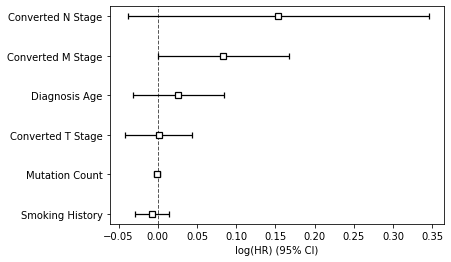

In [ ]:
#Plot the result on graph:

cph.plot()

In [ ]:
data.iloc[10:15,:]

,Study ID,Patient ID,Sample ID,Sample Type,Diagnosis Age,Cancer Type,Cancer Type Detailed,Mutation Count,Oncotree Code,Sex,Smoker,Smoking History,Chemotherapy,Overall survival months,Overall survival status,First Pathologic Diagnosis Biospecimen Acquisition Method Type,Radiation Therapy,M Stage,N Stage,T Stage,Previous Treatment,UICC Tumor Stage,dead
10,sclc_ucologne_2015,sclc_ucologne_2015_S01512,sclc_ucologne_2015_S01512,Primary,64.0,Small Cell Lung Cancer,Small Cell Lung Cancer,298.0,SCLC,Male,Current,40.0,Yes,4.0,0:LIVING,Surgical Resection,Yes,0,0,1,Untreated,Ia,0.0
11,sclc_ucologne_2015,sclc_ucologne_2015_S01516,sclc_ucologne_2015_S01516,Primary,62.0,Small Cell Lung Cancer,Small Cell Lung Cancer,209.0,SCLC,Female,Former,25.0,Yes,17.0,1:DECEASED,Surgical Resection,No,0,0,1,Untreated,Ia,1.0
12,sclc_ucologne_2015,sclc_ucologne_2015_S01524,sclc_ucologne_2015_S01524,Primary,77.0,Small Cell Lung Cancer,Small Cell Lung Cancer,103.0,SCLC,Male,Former,25.0,Yes,11.0,1:DECEASED,Surgical Resection,No,0,0,1,Untreated,Ia,1.0
13,sclc_ucologne_2015,sclc_ucologne_2015_S01542,sclc_ucologne_2015_S01542,Primary,74.0,Small Cell Lung Cancer,Small Cell Lung Cancer,267.0,SCLC,Female,Current,50.0,No,43.0,0:LIVING,Surgical Resection,No,0,0,2,Untreated,Ib,0.0
14,sclc_ucologne_2015,sclc_ucologne_2015_S01578,sclc_ucologne_2015_S01578,Primary,76.0,Small Cell Lung Cancer,Small Cell Lung Cancer,366.0,SCLC,Male,Former,60.0,Yes,34.0,1:DECEASED,Surgical Resection,No,0,0,1,Untreated,Ia,1.0


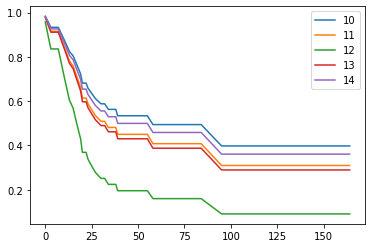

In [ ]:
#Plotting the data:

d_data = data.iloc[10:15,:]
cph.predict_survival_function(d_data).plot()